In [42]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt 

Load the data and seperate it into the x and y components

In [2]:
train = pd.read_csv("train.csv", dtype="double")
train_y = train['y']
train_x=train.drop(columns=['y'])

In [3]:
folds = 10 
alphas = [0.1,1,10,100,200]
solvers = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

In [8]:
mean_scores=[]
for alpha in alphas:
#     for solver in solvers:
#     print(solver)

    trainer = Ridge(alpha=alpha,solver='auto',tol=1e-5,max_iter=10000000)
    scores = cross_val_score(trainer,train_x,train_y,
                             cv=folds,scoring='neg_root_mean_squared_error')
    mean_scores.append(scores.mean())
    print("Alphas = {}: ".format(alpha))
    print(scores)
    print("Mean score: {}".format(mean_scores[-1]))
    print()

Alphas = 0.1: 
[-7.3390814  -4.54506728 -7.54909334 -5.42309382 -3.98159361 -5.89381912
 -6.40200605 -5.65682217 -4.62334569 -3.60417197]
Mean score: -5.501809445057858

Alphas = 1: 
[-7.46516297 -4.43238051 -7.55346334 -5.30074618 -3.96522119 -5.82855728
 -6.46733912 -5.83953487 -4.71684498 -3.42913698]
Mean score: -5.499838741278097

Alphas = 10: 
[-7.64246392 -3.81055479 -7.51525507 -5.32623186 -4.04238458 -6.09427973
 -6.44799273 -6.04890345 -4.60780506 -3.30044367]
Mean score: -5.483631486072287

Alphas = 100: 
[-8.13829115 -3.0668399  -7.33953615 -5.71973214 -4.27214133 -7.22215359
 -6.49221366 -6.56152216 -4.1294323  -3.42455897]
Mean score: -5.636642135414036

Alphas = 200: 
[-8.35811774 -3.08081784 -7.34531958 -5.68963324 -4.36132141 -7.62062969
 -6.55195073 -6.71953529 -3.97236016 -3.51265153]
Mean score: -5.721233719861128



In [ ]:
positive = np.abs(mean_scores)

In [ ]:
# data = {"y":pd.Series(positive)}
df = pd.DataFrame(positive)
df.to_csv("Task-1a.csv",header = None,index=False)


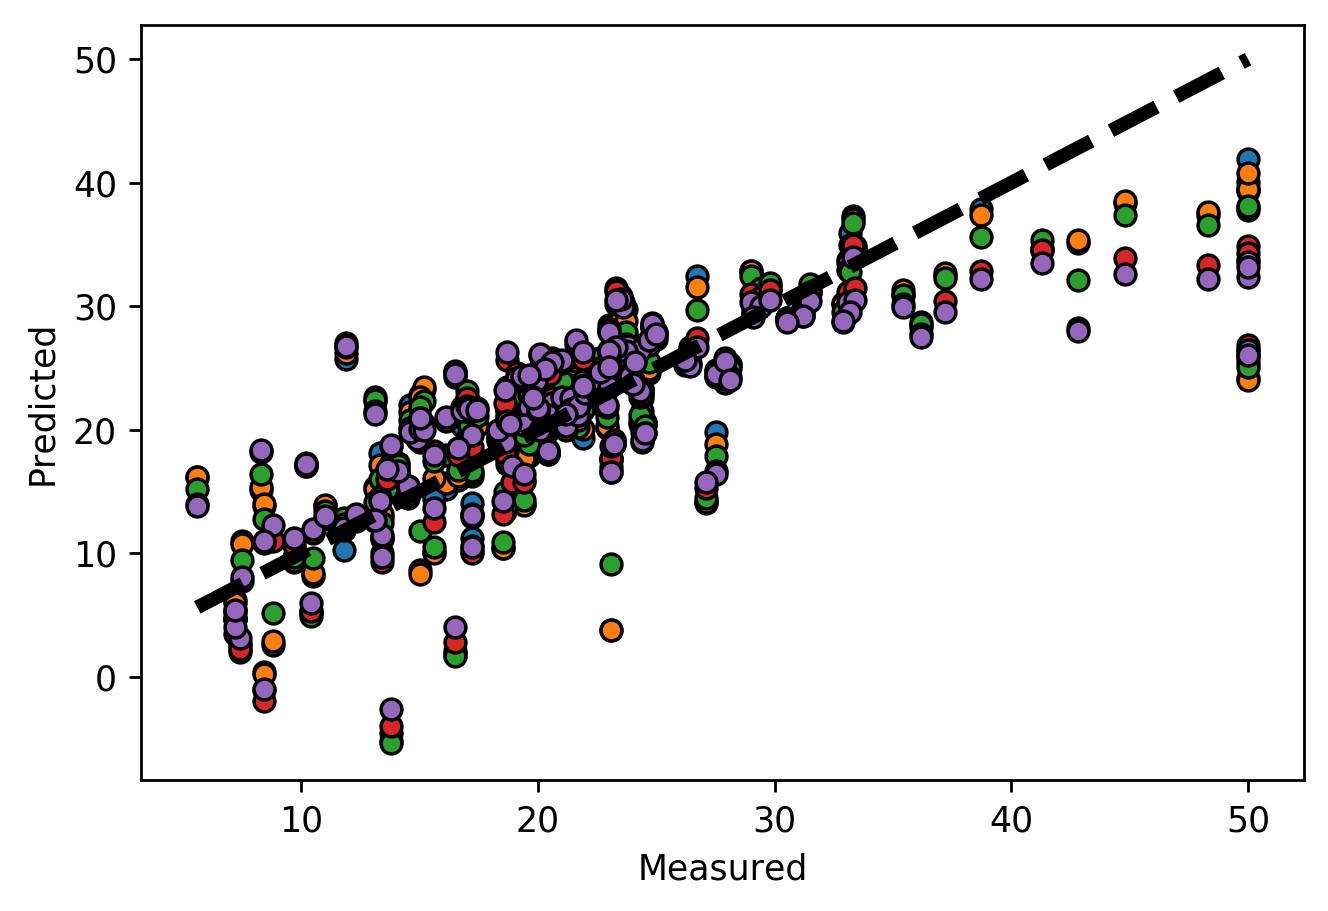

In [69]:
fig, ax = plt.subplots(dpi=250)
for alpha in alphas:
    trainer = Ridge(alpha=alpha,solver='svd',tol=1e-5,max_iter=10000000)
    predicted = cross_val_predict(trainer, train_x, train_y,cv=2)

    ax.scatter(train_y, predicted, edgecolors=(0, 0, 0))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
    # plt.plot(train_y)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()